### Clustering in new way (WIP)

In [16]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('data/Israel_w_lix_sentiment.csv')


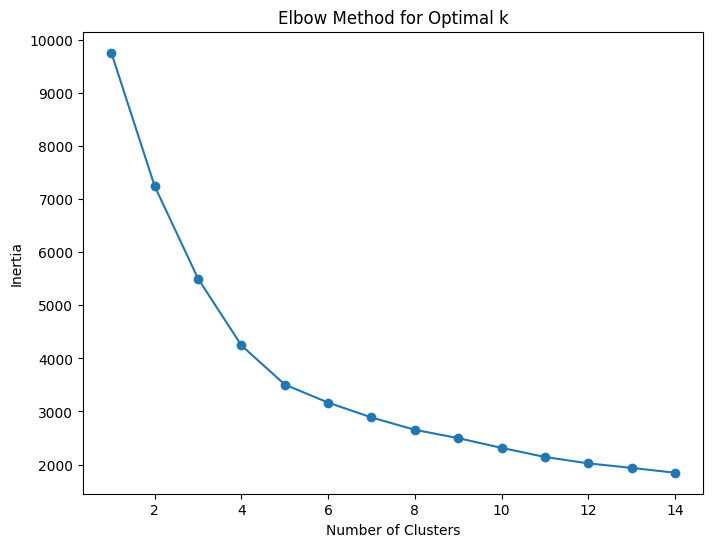

         sentiment_score  log_lix_score  log_upvotes
cluster                                             
0              -0.614334       3.568939     5.046786
1               0.389898       3.523580     4.984749
2               0.091220       1.995294     3.930708
3              -0.655070       3.623477     3.047857
4               0.371127       3.515394     2.982355


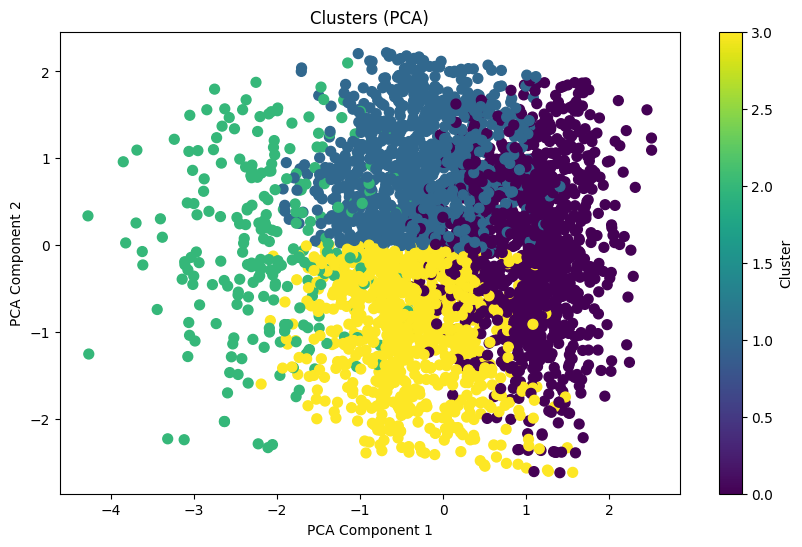

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Log-transform skewed features
df['log_upvotes'] = np.log1p(df['upvotes'])
df['log_lix_score'] = np.log1p(df['lix_score'])

# Cap extreme values (e.g., 99th percentile)
df['log_upvotes'] = df['log_upvotes'].clip(upper=df['log_upvotes'].quantile(0.99))
df['log_lix_score'] = df['log_lix_score'].clip(upper=df['log_lix_score'].quantile(0.99))


# Prepare features
features = df[['sentiment_score', 'log_lix_score', 'log_upvotes']]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to determine optimal k
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose optimal k and cluster
optimal_k = 4  # Adjust based on elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['KMEANS'] = kmeans.fit_predict(scaled_features)

# Summarize clusters
cluster_summary = df.groupby('cluster')[['sentiment_score', 'log_lix_score', 'log_upvotes']].mean()
print(cluster_summary)

# Visualize clusters
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['KMEANS'], cmap='viridis', s=50)
plt.title('Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [46]:
df.to_csv('data/Israel_clustered.csv', index=False)